In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import learning_curve
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.compose import ColumnTransformer
from sklearn.random_projection import SparseRandomProjection

In [2]:
bank_dataset = pd.read_csv('data/bank.csv', sep= ',', header=0)
bank_headers = list(bank_dataset)[:-1]
X = bank_dataset.values[:,:-1]
y = bank_dataset.values[:,-1]
seed = 0

pca_X = PCA(n_components=4, random_state=seed).fit_transform(X)
ica_X = FastICA(n_components=5, random_state=seed, max_iter=10000).fit_transform(X)
rp_X = SparseRandomProjection(n_components=13, random_state=seed).fit_transform(X)

rfc = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=seed)
fs_bank = rfc.fit(X,y).feature_importances_ 
rf_X = X[:, fs_bank >= np.mean(fs_bank)]

# Baseline Test from A1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Baseline Test from Assignment 1")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Wall time: 2.33 s
Baseline Test from Assignment 1
Confusion Matrix:
[[3593   44]
 [ 389   93]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      3637
         1.0       0.68      0.19      0.30       482

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.79      0.59      0.62      4119
weighted avg       0.88      0.89      0.87      4119

Accuracy   : 89.48773974265598
Train Score:  0.8985945129353368
CV Score   :  [0.88783685 0.88782778 0.88782778]
Test Score :  0.8948773974265598


# Training NN on Reduced Datasets

## PCA

In [8]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Wall time: 1.3 s
Confusion Matrix:
[[3606   52]
 [ 365   96]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      3658
         1.0       0.65      0.21      0.32       461

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.78      0.60      0.63      4119
weighted avg       0.88      0.90      0.87      4119

Accuracy   : 89.8761835396941
Train Score:  0.8984326526207883
CV Score   :  [0.89471555 0.90004856 0.88726125]
Test Score :  0.898761835396941


## ICA

In [10]:
X_train, X_test, y_train, y_test = train_test_split(ica_X, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Wall time: 1.91 s
Confusion Matrix:
[[3590   48]
 [ 384   97]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      3638
         1.0       0.67      0.20      0.31       481

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.79      0.59      0.63      4119
weighted avg       0.88      0.90      0.87      4119

Accuracy   : 89.51201747997086
Train Score:  0.8983786991826054
CV Score   :  [0.89892369 0.89818712 0.88782778]
Test Score :  0.8951201747997086


## Random Projection

In [14]:
X_train, X_test, y_train, y_test = train_test_split(rp_X, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Wall time: 1.31 s
Confusion Matrix:
[[3626   31]
 [ 405   57]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      3657
         1.0       0.65      0.12      0.21       462

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.77      0.56      0.58      4119
weighted avg       0.87      0.89      0.86      4119

Accuracy   : 89.41490653071133
Train Score:  0.8941433542852518
CV Score   :  [0.88727037 0.88727037 0.88733306]
Test Score :  0.8941490653071134


## Random Forest Dimensionality Reduction

In [17]:
X_train, X_test, y_train, y_test = train_test_split(rf_X, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=5))
print("Test Score : ", clf.score(X_test, y_test))

Wall time: 2.05 s
Confusion Matrix:
[[3661    0]
 [ 458    0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      3661
         1.0       0.00      0.00      0.00       458

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.44      0.50      0.47      4119
weighted avg       0.79      0.89      0.84      4119

Accuracy   : 88.88079630978393
Train Score:  0.8871833607596644


C:\Users\Benny\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CV Score   :  [0.8871207  0.8871207  0.88722515 0.88722515 0.88722515]
Test Score :  0.8888079630978393


# Using Clusters as Features

## Training NN with KMeans results on PCA

In [21]:
km = KMeans(n_clusters = 4, random_state=seed)
em = GMM(n_components = 5, random_state=seed)

pca_km_clusters = km.fit_predict(pca_X).reshape(-1,1)
pca_em_clusters = em.fit_predict(pca_X).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(pca_km_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3601   60]
 [ 369   89]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      3661
         1.0       0.60      0.19      0.29       458

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.75      0.59      0.62      4119
weighted avg       0.87      0.90      0.87      4119

Accuracy   : 89.58485069191552
Train Score:  0.8977042812053198
CV Score   :  [0.88718945 0.88718032 0.89923924]
Test Score :  0.8958485069191552


## Training NN with EM results on PCA

In [23]:
X_train, X_test, y_train, y_test = train_test_split(pca_em_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3596   45]
 [ 388   90]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      3641
         1.0       0.67      0.19      0.29       478

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.78      0.59      0.62      4119
weighted avg       0.88      0.89      0.87      4119

Accuracy   : 89.48773974265598
Train Score:  0.8978121880816855
CV Score   :  [0.89714332 0.88774684 0.88774684]
Test Score :  0.8948773974265598


## Training NN with PCA Data + KMeans results on PCA

In [26]:
X_train, X_test, y_train, y_test = train_test_split(np.hstack((pca_X, pca_km_clusters)), y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3551   65]
 [ 450   53]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      3616
         1.0       0.45      0.11      0.17       503

   micro avg       0.87      0.87      0.87      4119
   macro avg       0.67      0.54      0.55      4119
weighted avg       0.83      0.87      0.84      4119

Accuracy   : 87.49696528283563
Train Score:  0.8826512719523052
CV Score   :  [0.88840333 0.89842991 0.90012949]
Test Score :  0.8749696528283564


## Training NN with PCA Data + EM results on PCA

In [27]:
X_train, X_test, y_train, y_test = train_test_split(np.hstack((pca_X, pca_em_clusters)), y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3596   44]
 [ 380   99]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      3640
         1.0       0.69      0.21      0.32       479

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.80      0.60      0.63      4119
weighted avg       0.88      0.90      0.87      4119

Accuracy   : 89.70623937848993
Train Score:  0.8993498610698967
CV Score   :  [0.89876184 0.88774684 0.88750405]
Test Score :  0.8970623937848993


## Training NN with KMeans results on ICA

In [28]:
km = KMeans(n_clusters = 5, random_state=seed)
em = GMM(n_components = 4, random_state=seed)

ica_km_clusters = km.fit_predict(ica_X).reshape(-1,1)
ica_em_clusters = em.fit_predict(ica_X).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(ica_km_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3623   52]
 [ 345   99]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      3675
         1.0       0.66      0.22      0.33       444

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.78      0.60      0.64      4119
weighted avg       0.89      0.90      0.88      4119

Accuracy   : 90.36173828599175
Train Score:  0.8968410261943942
CV Score   :  [0.88678482 0.89592943 0.88684743]
Test Score :  0.9036173828599174


## Training NN with EM results on ICA

In [30]:
X_train, X_test, y_train, y_test = train_test_split(ica_em_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=5))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3595   58]
 [ 370   96]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      3653
         1.0       0.62      0.21      0.31       466

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.77      0.60      0.63      4119
weighted avg       0.87      0.90      0.87      4119

Accuracy   : 89.6091284292304
Train Score:  0.8976773044862284
CV Score   :  [0.88737524 0.88737524 0.89816563 0.89830051 0.89531903]
Test Score :  0.896091284292304


## Training NN with ICA Data + KMeans results on ICA

In [31]:
X_train, X_test, y_train, y_test = train_test_split(np.hstack((ica_X, ica_km_clusters)), y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3617   34]
 [ 387   81]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      3651
         1.0       0.70      0.17      0.28       468

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.80      0.58      0.61      4119
weighted avg       0.88      0.90      0.87      4119

Accuracy   : 89.77907259043457
Train Score:  0.8991880007553481
CV Score   :  [0.89762887 0.88743222 0.90076892]
Test Score :  0.8977907259043457


## Training NN with ICA Data + EM results on ICA

In [33]:
X_train, X_test, y_train, y_test = train_test_split(np.hstack((ica_X, ica_em_clusters)), y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3613   43]
 [ 367   96]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      3656
         1.0       0.69      0.21      0.32       463

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.80      0.60      0.63      4119
weighted avg       0.88      0.90      0.88      4119

Accuracy   : 90.04612770089827
Train Score:  0.8992959076317139
CV Score   :  [0.88727037 0.89721593 0.88734218]
Test Score :  0.9004612770089827


## Training NN with KMeans results on RP

In [35]:
km = KMeans(n_clusters = 4, random_state=seed)
em = GMM(n_components = 5, random_state=seed)

rp_km_clusters = km.fit_predict(rp_X).reshape(-1,1)
rp_em_clusters = em.fit_predict(rp_X).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(rp_km_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3571   52]
 [ 388  108]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      3623
         1.0       0.68      0.22      0.33       496

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.79      0.60      0.64      4119
weighted avg       0.87      0.89      0.87      4119

Accuracy   : 89.3177955814518
Train Score:  0.8980010251153254
CV Score   :  [0.88816056 0.89721593 0.88823244]
Test Score :  0.8931779558145181


## Training NN with EM results on RP

In [37]:
X_train, X_test, y_train, y_test = train_test_split(rp_em_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3617   68]
 [ 357   77]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      3685
         1.0       0.53      0.18      0.27       434

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.72      0.58      0.61      4119
weighted avg       0.87      0.90      0.87      4119

Accuracy   : 89.68196164117505
Train Score:  0.8975963743289541
CV Score   :  [0.88654204 0.88653286 0.88653286]
Test Score :  0.8968196164117505


## Training NN with RP Data + KMeans results on RP

In [40]:
X_train, X_test, y_train, y_test = train_test_split(np.hstack((rp_X,rp_km_clusters)), y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3621   35]
 [ 389   74]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      3656
         1.0       0.68      0.16      0.26       463

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.79      0.58      0.60      4119
weighted avg       0.88      0.90      0.87      4119

Accuracy   : 89.70623937848993
Train Score:  0.89694893307076
CV Score   :  [0.89528203 0.88734218 0.88734218]
Test Score :  0.8970623937848993


## Training NN with RP Data + EM results on RP

In [42]:
X_train, X_test, y_train, y_test = train_test_split(np.hstack((rp_X,rp_em_clusters)), y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3585   46]
 [ 395   93]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      3631
         1.0       0.67      0.19      0.30       488

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.78      0.59      0.62      4119
weighted avg       0.87      0.89      0.87      4119

Accuracy   : 89.29351784413693
Train Score:  0.898675443092611
CV Score   :  [0.88799871 0.89381677 0.8943833 ]
Test Score :  0.8929351784413693


## Training NN with KMeans results on RF

In [43]:
km = KMeans(n_clusters = 4, random_state=seed)
em = GMM(n_components = 4, random_state=seed)

rf_km_clusters = km.fit_predict(rf_X).reshape(-1,1)
rf_em_clusters = em.fit_predict(rf_X).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(rf_km_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3652    0]
 [ 467    0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      3652
         1.0       0.00      0.00      0.00       467

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.44      0.50      0.47      4119
weighted avg       0.79      0.89      0.83      4119

Accuracy   : 88.66229667395
Train Score:  0.8874261512314873


C:\Users\Benny\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CV Score   :  [0.88743222 0.88742311 0.88742311]
Test Score :  0.8866229667394999


## Training NN with EM results on RF

In [44]:
X_train, X_test, y_train, y_test = train_test_split(rf_em_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3660    0]
 [ 459    0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      3660
         1.0       0.00      0.00      0.00       459

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.44      0.50      0.47      4119
weighted avg       0.79      0.89      0.84      4119

Accuracy   : 88.85651857246904
Train Score:  0.8872103374787559


C:\Users\Benny\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CV Score   :  [0.88718945 0.88718945 0.88725212]
Test Score :  0.8885651857246905


## Training NN with RF Data + KMeans results on RF

In [45]:
X_train, X_test, y_train, y_test = train_test_split(np.hstack((rf_X,rf_km_clusters)), y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3660    0]
 [ 459    0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      3660
         1.0       0.00      0.00      0.00       459

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.44      0.50      0.47      4119
weighted avg       0.79      0.89      0.84      4119

Accuracy   : 88.85651857246904
Train Score:  0.887156384040573


C:\Users\Benny\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CV Score   :  [0.88718945 0.88718945 0.88725212]
Test Score :  0.8885651857246905


## Training NN with RF Data + EM results on RF

In [46]:
X_train, X_test, y_train, y_test = train_test_split(np.hstack((rf_X,rf_em_clusters)), y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy   :", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ", clf.score(X_train, y_train))
print("CV Score   : ", cross_val_score(clf, X_train, y_train, cv=3))
print("Test Score : ", clf.score(X_test, y_test))

Confusion Matrix:
[[3628    0]
 [ 491    0]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      3628
         1.0       0.00      0.00      0.00       491

   micro avg       0.88      0.88      0.88      4119
   macro avg       0.44      0.50      0.47      4119
weighted avg       0.78      0.88      0.82      4119

Accuracy   : 88.07963097839281
Train Score:  0.8880735924896814


C:\Users\Benny\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CV Score   :  [0.88807963 0.88807057 0.88807057]
Test Score :  0.8807963097839281


In [232]:
def plot_learning_curves(clf, all_X, y, title, X_titles, train_sizes=np.linspace(.1, 1.0, 10), cv=None, ylim=None, show=False):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores = []
    test_scores = []
    for X in all_X:
        train_sizes, train_score, test_score = learning_curve(clf, X, y, cv=cv, train_sizes=train_sizes)
        train_scores.append(train_score)
        test_scores.append(test_score)
        
    plt.grid()
    for i in range(len(X_titles)):
        test_score_mean = np.mean(test_scores[i], axis=1)
        plt.plot(train_sizes, test_score_mean, 'o-', label="CV Score: " + str(X_titles[i]))

    plt.legend(loc="best")
    plt.savefig('plots/NN/learningcurves.png')
    if show: plt.show()
    plt.close()
    return

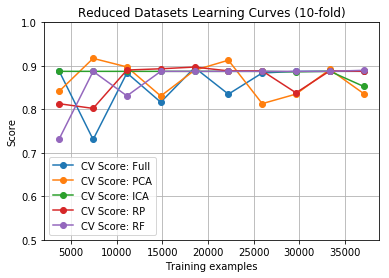

In [309]:
all_X = [X, pca_X, ica_X, rp_X, rf_X]
X_titles = ['Full', 'PCA', 'ICA', 'RP', 'RF']
clf = MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
plot_learning_curves(clf, all_X, y, 'Reduced Datasets Learning Curves (10-fold)', X_titles, ylim=(0.5,1.0), cv=10, show=True)

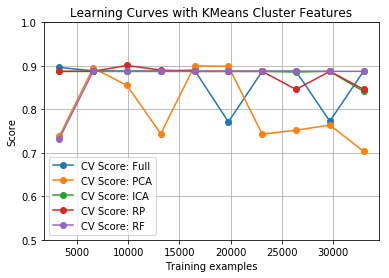

In [312]:
all_X_clusters = [X, pca_km_clusters, ica_km_clusters, rp_km_clusters, rf_km_clusters]
X_titles = ['Full', 'PCA', 'ICA', 'RP', 'RF']
clf = MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
plot_learning_curves(clf, all_X, y, 'Learning Curves with KMeans Cluster Features', X_titles, ylim=(0.5,1.0), cv=5, show=True)

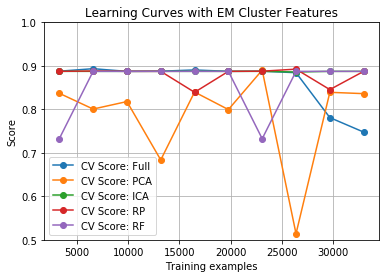

In [311]:
all_X_clusters = [X, pca_em_clusters, ica_em_clusters, rp_em_clusters, rf_em_clusters]
X_titles = ['Full', 'PCA', 'ICA', 'RP', 'RF']
clf = MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
plot_learning_curves(clf, all_X, y, 'Learning Curves with EM Cluster Features', X_titles, ylim=(0.5,1.0), cv=5, show=True)

In [49]:
#PCA
X_train, X_test, y_train, y_test = train_test_split(pca_km_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(pca_em_clusters, y, test_size=0.10) \

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)

# ICA
X_train, X_test, y_train, y_test = train_test_split(ica_km_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(ica_em_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)

#RP
X_train, X_test, y_train, y_test = train_test_split(rp_km_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(rp_em_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)

#RF
X_train, X_test, y_train, y_test = train_test_split(rf_km_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(rf_em_clusters, y, test_size=0.10) 

clf =  MLPClassifier(hidden_layer_sizes=(15, 2), max_iter=10000)
%time clf.fit(X_train, y_train)


Wall time: 1.68 s
Wall time: 3.24 s
Wall time: 1.84 s
Wall time: 3.29 s
Wall time: 3 s
Wall time: 2.03 s
Wall time: 876 ms
Wall time: 1.06 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)